<ipython-input-3-cd72096ee846>:47: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(x[frame], y[frame])


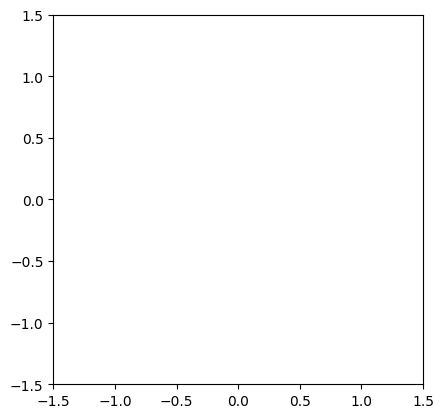

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Update function for theta
def update_theta(theta, w, delta):
    theta += delta * w
    if theta > 2 * np.pi:
        theta -= 2 * np.pi
    elif theta < 0:
        theta += 2 * np.pi
    return theta

w = 1.0  # Angular velocity

# Time parameters
t0 = 0.0
t1 = 10.0
n_points = 100

t = np.linspace(t0, t1, n_points)
delta = (t1 - t0) / n_points

theta = 0.0
x = np.zeros(n_points)
y = np.zeros(n_points)

# Calculate the positions
for t_index in range(n_points):
    theta = update_theta(theta, w, delta)
    x[t_index] = np.cos(theta)
    y[t_index] = np.sin(theta)

fig, ax = plt.subplots()
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect('equal')  # Make the scale of the x and y axis the same

point, = ax.plot([], [], 'bo')

def init():
    point.set_data([], [])
    return (point,)

def update(frame):
    point.set_data(x[frame], y[frame])
    return (point,)

ani = FuncAnimation(fig, update, frames=range(n_points), init_func=init, blit=False)

# Display the animation in the notebook
HTML(ani.to_jshtml())